In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Fetch "bookings" table data from MySQL "hospitalitydb" database to python notebook
import mysql.connector

# Connect to the database
cnx = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='Samhita@11',
    database='hospitalitydb'
)

# Create a cursor
cursor = cnx.cursor()

# Execute a SELECT statement
query = 'SELECT * FROM bookings'
cursor.execute(query)

# Fetch all the rows
rows = cursor.fetchall()

# Loop through the rows and print the data
#for row in rows:
#    print(row)

# Close the cursor and connection
cursor.close()
cnx.close()

# Convert the rows to a DataFrame
df = pd.DataFrame(rows)
print(df)


                       0      1           2           3           4   5    6   \
0        May012216558RT11  16558  2022-04-27  2022-05-01  2022-05-02   3  RT1   
1        May012216558RT12  16558  2022-04-30  2022-05-01  2022-05-02   2  RT1   
2        May012216558RT13  16558  2022-04-28  2022-05-01  2022-05-04   2  RT1   
3        May012216558RT14  16558  2022-04-28  2022-05-01  2022-05-02   2  RT1   
4        May012216558RT15  16558  2022-04-27  2022-05-01  2022-05-02   4  RT1   
...                   ...    ...         ...         ...         ...  ..  ...   
134585   Jul312217564RT46  17564  2022-07-29  2022-07-31  2022-08-03   1  RT4   
134586   Jul312217564RT47  17564  2022-07-30  2022-07-31  2022-08-01   4  RT4   
134587   Jul312217564RT48  17564  2022-07-30  2022-07-31  2022-08-02   1  RT4   
134588   Jul312217564RT49  17564  2022-07-29  2022-07-31  2022-08-01   2  RT4   
134589  Jul312217564RT410  17564  2022-07-31  2022-07-31  2022-08-01   2  RT4   

                   7    8  

In [3]:
df.shape

(134590, 12)

In [4]:
nameDict={0:"booking_id",1:"property_id",2:"booking_date",3:"check_in_date",4:"checkout_date",5:"no_guests",6:"room_category",7:"booking_platform",8:"ratings_given",9:"booking_status",10:"revenue_generated",11:"revenue_realized"}
df=df.rename(columns=nameDict)
print(df.columns.values)

['booking_id' 'property_id' 'booking_date' 'check_in_date' 'checkout_date'
 'no_guests' 'room_category' 'booking_platform' 'ratings_given'
 'booking_status' 'revenue_generated' 'revenue_realized']


In [5]:
df.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920


In [6]:
df.columns

Index(['booking_id', 'property_id', 'booking_date', 'check_in_date',
       'checkout_date', 'no_guests', 'room_category', 'booking_platform',
       'ratings_given', 'booking_status', 'revenue_generated',
       'revenue_realized'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134590 non-null  int64  
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 12.3+ MB


In [8]:
df.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134590.000000,56683.000000,134590.000000,134590.000000
mean,18061.113493,2.036808,3.619004,14916.013188,12696.123256
std,1093.055847,1.031766,1.235009,6452.868072,6928.108124
min,16558.000000,1.000000,1.000000,6500.000000,2600.000000
25%,17558.000000,1.000000,3.000000,9900.000000,7600.000000
50%,17564.000000,2.000000,4.000000,13500.000000,11700.000000
75%,18563.000000,2.000000,5.000000,18000.000000,15300.000000
max,19563.000000,6.000000,5.000000,45220.000000,45220.000000


In [9]:
df.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77907
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [10]:
# to check details about "property_id"
dfpid=df['property_id'].value_counts()
dfpid.sort_values()

16558    3153
17562    3424
17564    3982
19558    4371
16561    4418
18558    4475
16560    4693
19559    4705
18563    4728
16562    4820
17558    5036
17561    5183
18559    5256
19563    5413
19561    5736
19562    5812
19560    5979
17560    6013
17559    6142
17563    6337
18561    6458
18560    6638
16563    7147
18562    7333
16559    7338
Name: property_id, dtype: int64

In [11]:
# to check details about "room_category"
df['room_category'].value_counts()

RT2    49505
RT1    38446
RT3    30566
RT4    16073
Name: room_category, dtype: int64

In [12]:
# to check details about "booking_platform"
df['booking_platform'].value_counts()

others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: booking_platform, dtype: int64

In [13]:
# to check details about "ratings_given"
df['ratings_given'].value_counts()

5.0    19480
3.0    17561
4.0     9653
2.0     6452
1.0     3537
Name: ratings_given, dtype: int64

In [14]:
# to check details about "booking_status"
df['booking_status'].value_counts()

Checked Out    94411
Cancelled      33420
No Show         6759
Name: booking_status, dtype: int64

In [15]:
# to fetch unique details about "property_id"
uniquePropId=df['property_id'].unique()
print(uniquePropId)

[16558 16559 16560 16561 16562 16563 17558 17559 17560 17561 17562 17563
 18558 18559 18560 18561 18562 18563 19558 19559 19560 19561 19562 19563
 17564]


In [16]:
# to find data type of uniquePropId
type(uniquePropId)

numpy.ndarray

In [17]:
#to count number of property id-method 1
print(len(df['property_id'].unique()))


25


In [18]:
#to count number of property id--method 2
print(np.count_nonzero(uniquePropId))

25


In [19]:
#to know count of unique values in each columns
print(df.nunique(axis=0, dropna=False))

booking_id           134590
property_id              25
booking_date            116
check_in_date            92
checkout_date            97
no_guests                 6
room_category             4
booking_platform          7
ratings_given             6
booking_status            3
revenue_generated        62
revenue_realized        124
dtype: int64


Text(0, 0.5, 'revenue_realized')

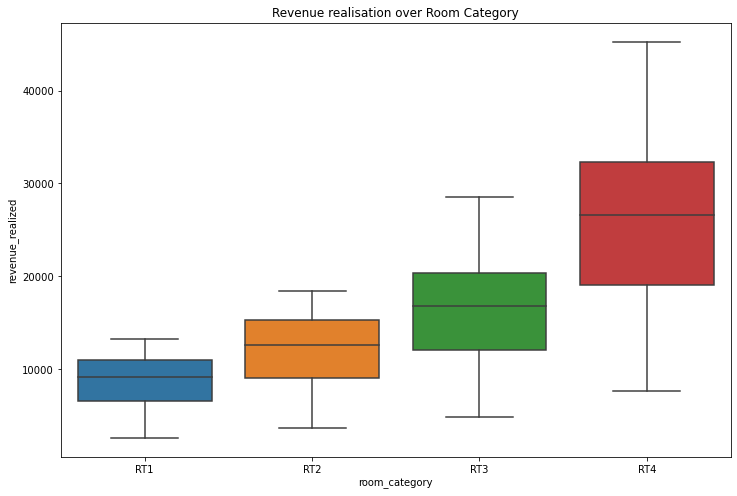

In [20]:
plt.figure(figsize=(12,8))
sns.boxplot(x='room_category',y='revenue_realized',data=df)
plt.title('Revenue realisation over Room Category')
plt.xlabel('room_category')
plt.ylabel('revenue_realized')

Text(0, 0.5, 'revenue_realized')

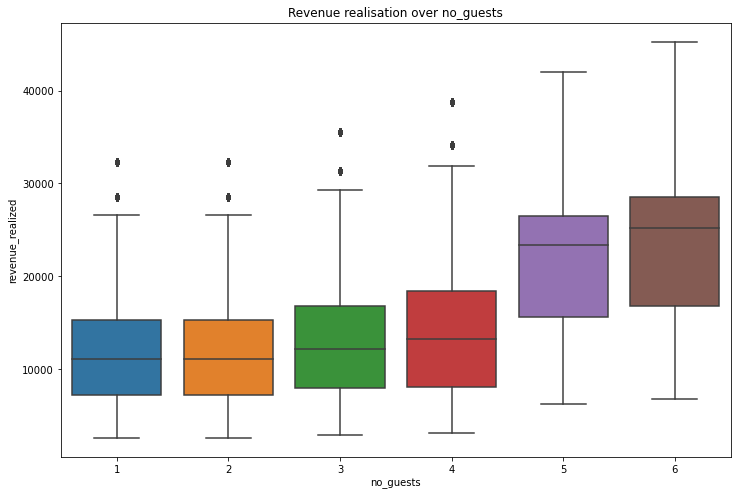

In [21]:
plt.figure(figsize=(12,8))
sns.boxplot(x='no_guests',y='revenue_realized',data=df)
plt.title('Revenue realisation over no_guests')
plt.xlabel('no_guests')
plt.ylabel('revenue_realized')

Text(0, 0.5, 'revenue_realized')

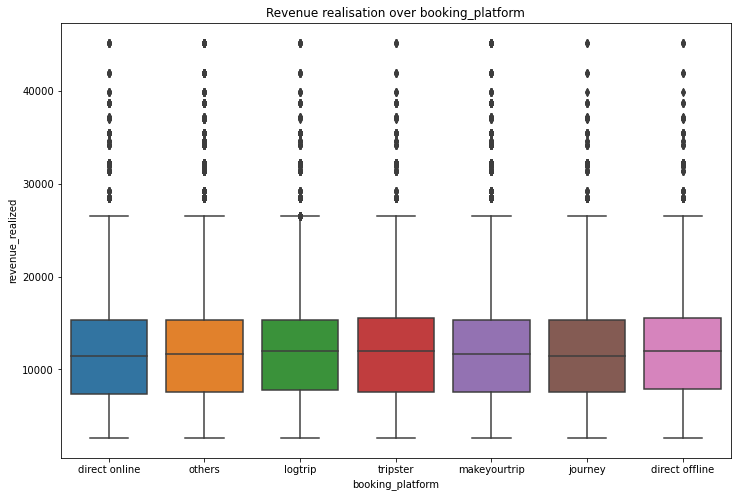

In [22]:
plt.figure(figsize=(12,8))
sns.boxplot(x='booking_platform',y='revenue_realized',data=df)
plt.title('Revenue realisation over booking_platform')
plt.xlabel('booking_platform')
plt.ylabel('revenue_realized')

In [23]:
# Now we get the data for Rooms & Property Name
dfHotel=pd.read_csv(r'C:\ProgramData\MySQL\MySQL Server 8.0\Uploads\DatasetsHospitality\dim_hotels.csv')
dfHotel.head()

,property_id,property_name,category,city
0,16558,Ajitra Grands,Luxury,Delhi
1,16559,Ajitra Exotica,Luxury,Mumbai
2,16560,Ajitra City,Business,Delhi
3,16561,Ajitra Blu,Luxury,Delhi
4,16562,Ajitra Bay,Luxury,Delhi


In [24]:
dfRoom=pd.read_csv(r'C:\ProgramData\MySQL\MySQL Server 8.0\Uploads\DatasetsHospitality\dim_rooms.csv')
dfRoom.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [25]:
roomdict={'room_id':'room_category'}
dfRoom=dfRoom.rename(columns=roomdict)
dfRoom.head()

,room_category,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [26]:
dfmerghotel=df.merge(dfHotel,on='property_id',how='left')
print(dfmerghotel)

               booking_id  property_id booking_date check_in_date  \
0        May012216558RT11        16558   2022-04-27    2022-05-01   
1        May012216558RT12        16558   2022-04-30    2022-05-01   
2        May012216558RT13        16558   2022-04-28    2022-05-01   
3        May012216558RT14        16558   2022-04-28    2022-05-01   
4        May012216558RT15        16558   2022-04-27    2022-05-01   
...                   ...          ...          ...           ...   
134585   Jul312217564RT46        17564   2022-07-29    2022-07-31   
134586   Jul312217564RT47        17564   2022-07-30    2022-07-31   
134587   Jul312217564RT48        17564   2022-07-30    2022-07-31   
134588   Jul312217564RT49        17564   2022-07-29    2022-07-31   
134589  Jul312217564RT410        17564   2022-07-31    2022-07-31   

       checkout_date  no_guests room_category booking_platform  ratings_given  \
0         2022-05-02          3           RT1    direct online            1.0   
1        

In [27]:
dfbookings=dfmerghotel.merge(dfRoom,on='room_category',how='left')
print(dfbookings)

               booking_id  property_id booking_date check_in_date  \
0        May012216558RT11        16558   2022-04-27    2022-05-01   
1        May012216558RT12        16558   2022-04-30    2022-05-01   
2        May012216558RT13        16558   2022-04-28    2022-05-01   
3        May012216558RT14        16558   2022-04-28    2022-05-01   
4        May012216558RT15        16558   2022-04-27    2022-05-01   
...                   ...          ...          ...           ...   
134585   Jul312217564RT46        17564   2022-07-29    2022-07-31   
134586   Jul312217564RT47        17564   2022-07-30    2022-07-31   
134587   Jul312217564RT48        17564   2022-07-30    2022-07-31   
134588   Jul312217564RT49        17564   2022-07-29    2022-07-31   
134589  Jul312217564RT410        17564   2022-07-31    2022-07-31   

       checkout_date  no_guests room_category booking_platform  ratings_given  \
0         2022-05-02          3           RT1    direct online            1.0   
1        

In [28]:
mean_hotel=dfbookings.groupby('property_name')['revenue_realized'].mean().reset_index()
mean_hotel.sort_values(by=['revenue_realized'],ascending=False)

,property_name,revenue_realized
6,Ajitra Seasons,16606.101205
3,Ajitra Exotica,13664.624717
5,Ajitra Palace,12871.189968
4,Ajitra Grands,12417.538245
2,Ajitra City,12254.510097
0,Ajitra Bay,12158.173734
1,Ajitra Blu,11968.594724


In [29]:
min_hotel=dfbookings.groupby('property_name')['revenue_realized'].min().reset_index()
min_hotel.sort_values(by=['revenue_realized'])

,property_name,revenue_realized
0,Ajitra Bay,2600
1,Ajitra Blu,2600
2,Ajitra City,2600
3,Ajitra Exotica,2600
4,Ajitra Grands,2600
5,Ajitra Palace,2600
6,Ajitra Seasons,4420


In [30]:
max_hotel=dfbookings.groupby('property_name')['revenue_realized'].max().reset_index()
max_hotel.sort_values(by=['revenue_realized'],ascending=False)

,property_name,revenue_realized
0,Ajitra Bay,45220
1,Ajitra Blu,45220
2,Ajitra City,45220
3,Ajitra Exotica,45220
4,Ajitra Grands,45220
5,Ajitra Palace,45220
6,Ajitra Seasons,45220


In [31]:
mean_room=dfbookings.groupby('room_class')['revenue_realized'].mean().reset_index()
mean_room.sort_values(by=['revenue_realized'],ascending=False)

,room_class,revenue_realized
2,Presidential,23440.103652
1,Premium,15120.275600
0,Elite,11317.467003
3,Standard,8052.356422


In [32]:
min_room=dfbookings.groupby('room_class')['revenue_realized'].min().reset_index()
min_room.sort_values(by=['revenue_realized'])

,room_class,revenue_realized
3,Standard,2600
0,Elite,3600
1,Premium,4800
2,Presidential,7600


In [33]:
max_room=dfbookings.groupby('room_class')['revenue_realized'].max().reset_index()
max_room.sort_values(by=['revenue_realized'],ascending=False)

,room_class,revenue_realized
2,Presidential,45220
1,Premium,28560
0,Elite,18360
3,Standard,13260


In [34]:
#TO VIEW MIN, MAX & MEAN OF REVENUE REALIZED FOR HOTELS

from functools import reduce

#define list of DataFrames
dfs = [min_hotel,max_hotel,mean_hotel]

#merge all DataFrames into one
combined_df = reduce(lambda  left,right: pd.merge(left,right,on=['property_name'],how='inner'),dfs)

#view merged DataFrame
combined_df.columns=['Hotel','Min Realz Rev','Max Realz Rev','Mean Realz Rev']
print(combined_df)

            Hotel  Min Realz Rev  Max Realz Rev  Mean Realz Rev
0      Ajitra Bay           2600          45220    12158.173734
1      Ajitra Blu           2600          45220    11968.594724
2     Ajitra City           2600          45220    12254.510097
3  Ajitra Exotica           2600          45220    13664.624717
4   Ajitra Grands           2600          45220    12417.538245
5   Ajitra Palace           2600          45220    12871.189968
6  Ajitra Seasons           4420          45220    16606.101205


In [35]:
#TO VIEW MIN, MAX & MEAN OF REVENUE REALIZED FOR ROOM CATEGORY

#from functools import reduce

#define list of DataFrames
dfs1 = [min_room,max_room,mean_room]

#merge all DataFrames into one
combined_df1 = reduce(lambda  left,right: pd.merge(left,right,on=['room_class'],how='inner'),dfs1)

#view merged DataFrame
combined_df1.columns=['Room Class','Min Realz Rev','Max Realz Rev','Mean Realz Rev']
print(combined_df1)

     Room Class  Min Realz Rev  Max Realz Rev  Mean Realz Rev
0         Elite           3600          18360    11317.467003
1       Premium           4800          28560    15120.275600
2  Presidential           7600          45220    23440.103652
3      Standard           2600          13260     8052.356422


In [36]:
type(combined_df1)

pandas.core.frame.DataFrame

In [37]:
import datetime

dfbookings['Stay']=dfbookings['checkout_date']-dfbookings['check_in_date']

In [38]:
dfbookings.dtypes

booking_id                    object
property_id                    int64
booking_date                  object
check_in_date                 object
checkout_date                 object
no_guests                      int64
room_category                 object
booking_platform              object
ratings_given                float64
booking_status                object
revenue_generated              int64
revenue_realized               int64
property_name                 object
category                      object
city                          object
room_class                    object
Stay                 timedelta64[ns]
dtype: object

In [39]:
dfbookings.columns

Index(['booking_id', 'property_id', 'booking_date', 'check_in_date',
       'checkout_date', 'no_guests', 'room_category', 'booking_platform',
       'ratings_given', 'booking_status', 'revenue_generated',
       'revenue_realized', 'property_name', 'category', 'city', 'room_class',
       'Stay'],
      dtype='object')

In [40]:
dfbookings['Stay']=dfbookings['Stay'].dt.days


In [41]:
dfbookings.dtypes

booking_id            object
property_id            int64
booking_date          object
check_in_date         object
checkout_date         object
no_guests              int64
room_category         object
booking_platform      object
ratings_given        float64
booking_status        object
revenue_generated      int64
revenue_realized       int64
property_name         object
category              object
city                  object
room_class            object
Stay                   int64
dtype: object

In [42]:
dfbookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,room_class,Stay
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,Ajitra Grands,Luxury,Delhi,Standard,1
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Ajitra Grands,Luxury,Delhi,Standard,1
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,Ajitra Grands,Luxury,Delhi,Standard,3
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Ajitra Grands,Luxury,Delhi,Standard,1
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920,Ajitra Grands,Luxury,Delhi,Standard,1


In [43]:
dfbookings['RevenuePerPax']=dfbookings['revenue_realized']/dfbookings['no_guests']

In [44]:
dfbookings['DayRevenuePerPax']=dfbookings['RevenuePerPax']/dfbookings['Stay']

In [45]:
dfbookings.columns

Index(['booking_id', 'property_id', 'booking_date', 'check_in_date',
       'checkout_date', 'no_guests', 'room_category', 'booking_platform',
       'ratings_given', 'booking_status', 'revenue_generated',
       'revenue_realized', 'property_name', 'category', 'city', 'room_class',
       'Stay', 'RevenuePerPax', 'DayRevenuePerPax'],
      dtype='object')

In [46]:
dfbookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized,Stay,RevenuePerPax,DayRevenuePerPax
count,134590.000000,134590.000000,56683.000000,134590.000000,134590.000000,134590.000000,134590.000000,134590.000000
mean,18061.113493,2.036808,3.619004,14916.013188,12696.123256,2.374552,7646.254898,5115.362230
std,1093.055847,1.031766,1.235009,6452.868072,6928.108124,1.733514,5568.239045,5127.651002
min,16558.000000,1.000000,1.000000,6500.000000,2600.000000,1.000000,780.000000,130.000000
25%,17558.000000,1.000000,3.000000,9900.000000,7600.000000,1.000000,3780.000000,1583.333333
50%,17564.000000,2.000000,4.000000,13500.000000,11700.000000,2.000000,6120.000000,3360.000000
75%,18563.000000,2.000000,5.000000,18000.000000,15300.000000,3.000000,9750.000000,6750.000000
max,19563.000000,6.000000,5.000000,45220.000000,45220.000000,6.000000,32300.000000,32300.000000


In [47]:
dfbookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,room_class,Stay,RevenuePerPax,DayRevenuePerPax
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,Ajitra Grands,Luxury,Delhi,Standard,1,3336.666667,3336.666667
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Ajitra Grands,Luxury,Delhi,Standard,1,1820.000000,1820.000000
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,Ajitra Grands,Luxury,Delhi,Standard,3,4550.000000,1516.666667
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Ajitra Grands,Luxury,Delhi,Standard,1,1820.000000,1820.000000
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920,Ajitra Grands,Luxury,Delhi,Standard,1,2730.000000,2730.000000


In [48]:
dfbookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized,Stay,RevenuePerPax,DayRevenuePerPax
count,134590.000000,134590.000000,56683.000000,134590.000000,134590.000000,134590.000000,134590.000000,134590.000000
mean,18061.113493,2.036808,3.619004,14916.013188,12696.123256,2.374552,7646.254898,5115.362230
std,1093.055847,1.031766,1.235009,6452.868072,6928.108124,1.733514,5568.239045,5127.651002
min,16558.000000,1.000000,1.000000,6500.000000,2600.000000,1.000000,780.000000,130.000000
25%,17558.000000,1.000000,3.000000,9900.000000,7600.000000,1.000000,3780.000000,1583.333333
50%,17564.000000,2.000000,4.000000,13500.000000,11700.000000,2.000000,6120.000000,3360.000000
75%,18563.000000,2.000000,5.000000,18000.000000,15300.000000,3.000000,9750.000000,6750.000000
max,19563.000000,6.000000,5.000000,45220.000000,45220.000000,6.000000,32300.000000,32300.000000


In [49]:
dfstays=dfbookings['Stay'].value_counts()
dfstays.sort_values()

4     6717
3    10842
6    12738
5    13083
2    27144
1    64066
Name: Stay, dtype: int64

In [50]:
dfstaysbook = pd.DataFrame(dfstays).reset_index()
dfstaysbook.columns = ['Stayed Days','No.of Bookings']
dfstaysbook.sort_values(by=['Stayed Days'])

,Stayed Days,No.of Bookings
0,1,64066
1,2,27144
4,3,10842
5,4,6717
2,5,13083
3,6,12738


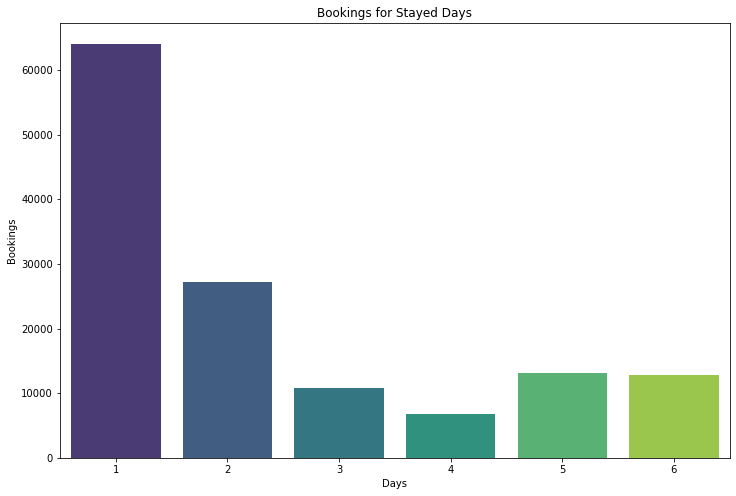

In [51]:
# Create a column chart using seaborn's barplot function for Days and Bookings
plt.figure(figsize=(12,8))
sns.barplot(x='Stayed Days', y='No.of Bookings', data=dfstaysbook, palette='viridis')

# Add labels and title to the chart
plt.title('Bookings for Stayed Days')
plt.xlabel('Days')
plt.ylabel('Bookings')

# Show the chart
plt.show()

In [52]:
daysforhotel=dfbookings.groupby('property_name')['Stay'].sum().reset_index()
daysforhotel.sort_values(by=['Stay'],ascending=False)

,property_name,Stay
3,Ajitra Exotica,64245
1,Ajitra Blu,59966
0,Ajitra Bay,58615
4,Ajitra Grands,46515
5,Ajitra Palace,41902
2,Ajitra City,41211
6,Ajitra Seasons,7137


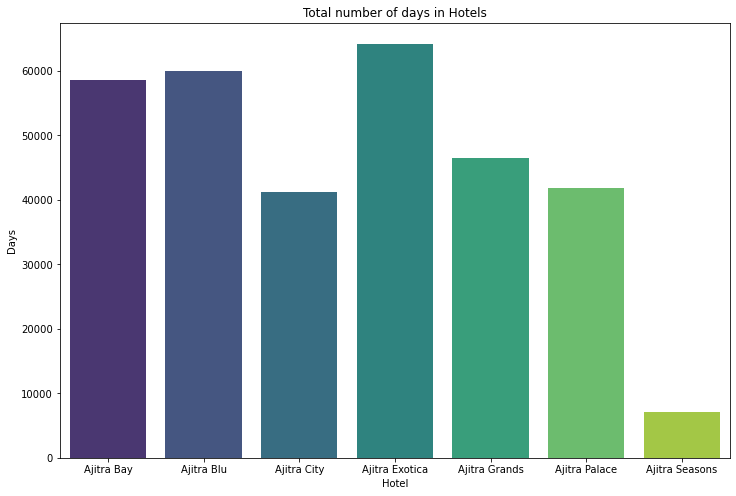

In [53]:
# Create a column chart using seaborn's barplot function for Total days for hotels
plt.figure(figsize=(12,8))
sns.barplot(x='property_name', y='Stay', data=daysforhotel, palette='viridis')

# Add labels and title to the chart
plt.title('Total number of days in Hotels')
plt.xlabel('Hotel')
plt.ylabel('Days')

# Show the chart
plt.show()

In [54]:
daysforclass=dfbookings.groupby('room_class')['Stay'].sum().reset_index()
daysforclass.sort_values(by=['Stay'],ascending=False)

,room_class,Stay
0,Elite,117486
3,Standard,91254
1,Premium,73681
2,Presidential,37170


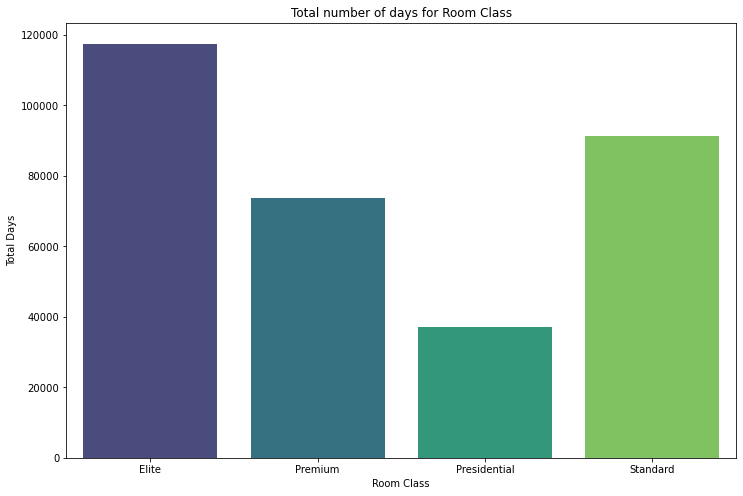

In [55]:
# Create a column chart using seaborn's barplot function for Total days for room class
plt.figure(figsize=(12,8))
sns.barplot(x='room_class', y='Stay', data=daysforclass, palette='viridis')

# Add labels and title to the chart
plt.title('Total number of days for Room Class')
plt.xlabel('Room Class')
plt.ylabel('Total Days')

# Show the chart
plt.show()

In [56]:
daysforcity=dfbookings.groupby('city')['Stay'].sum().reset_index()
daysforcity.sort_values(by=['Stay'],ascending=False)

,city,Stay
3,Mumbai,103385
2,Hyderabad,84971
0,Bangalore,76287
1,Delhi,54948


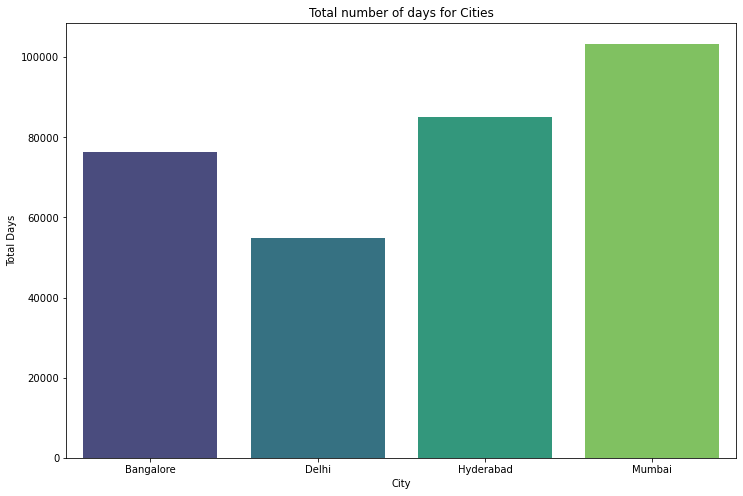

In [57]:
# Create a column chart using seaborn's barplot function for Total days for room class
plt.figure(figsize=(12,8))
sns.barplot(x='city', y='Stay', data=daysforcity, palette='viridis')

# Add labels and title to the chart
plt.title('Total number of days for Cities')
plt.xlabel('City')
plt.ylabel('Total Days')

# Show the chart
plt.show()

In [58]:
citybookings=dfbookings.groupby('city')['booking_id'].count().reset_index()
citybookings.sort_values(by=['booking_id'],ascending=False)

,city,booking_id
3,Mumbai,43455
2,Hyderabad,34888
0,Bangalore,32016
1,Delhi,24231


In [59]:
citybookstatus=dfbookings.groupby(['booking_status','city'])['booking_id'].count().reset_index()
print(citybookstatus)

   booking_status       city  booking_id
0       Cancelled  Bangalore        8002
1       Cancelled      Delhi        6072
2       Cancelled  Hyderabad        8592
3       Cancelled     Mumbai       10754
4     Checked Out  Bangalore       22385
5     Checked Out      Delhi       16975
6     Checked Out  Hyderabad       24535
7     Checked Out     Mumbai       30516
8         No Show  Bangalore        1629
9         No Show      Delhi        1184
10        No Show  Hyderabad        1761
11        No Show     Mumbai        2185


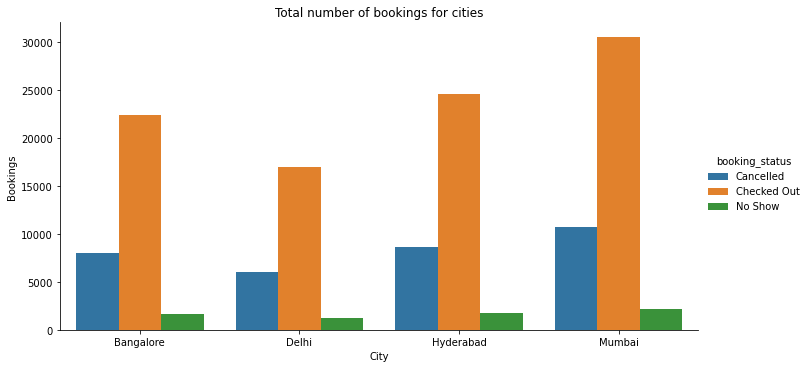

In [60]:
# Create the clustered column chart
sns.catplot(x="city", y="booking_id", hue="booking_status", kind="bar", data=citybookstatus,height=5, aspect=2)
           
# Add labels and title to the chart
plt.title('Total number of bookings for cities')
plt.xlabel('City')
plt.ylabel('Bookings')
# Show the plot
plt.show()


In [61]:
roombookstatus=dfbookings.groupby(['booking_status','room_class'])['booking_id'].count().reset_index()
print(roombookstatus)

   booking_status    room_class  booking_id
0       Cancelled         Elite       12357
1       Cancelled       Premium        7605
2       Cancelled  Presidential        3928
3       Cancelled      Standard        9530
4     Checked Out         Elite       34653
5     Checked Out       Premium       21447
6     Checked Out  Presidential       11344
7     Checked Out      Standard       26967
8         No Show         Elite        2495
9         No Show       Premium        1514
10        No Show  Presidential         801
11        No Show      Standard        1949


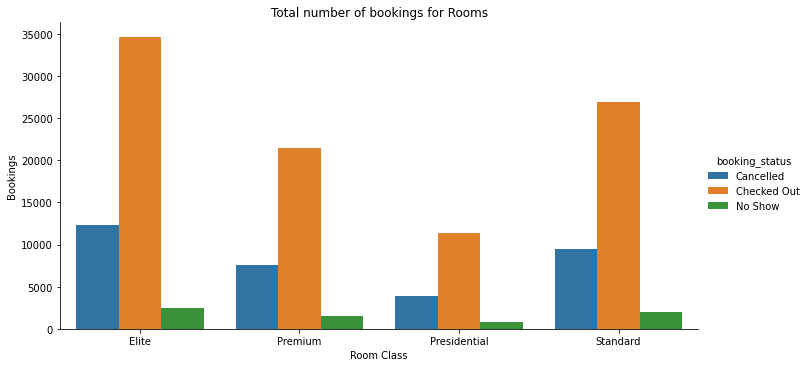

In [62]:
# Create the clustered column chart
sns.catplot(x="room_class", y="booking_id", hue="booking_status", kind="bar", data=roombookstatus,height=5, aspect=2)
           
# Add labels and title to the chart
plt.title('Total number of bookings for Rooms')
plt.xlabel('Room Class')
plt.ylabel('Bookings')
# Show the plot
plt.show()


In [63]:
hotelbookstatus=dfbookings.groupby(['booking_status','property_name'])['booking_id'].count().reset_index()
print(hotelbookstatus)

   booking_status   property_name  booking_id
0       Cancelled      Ajitra Bay        5314
1       Cancelled      Ajitra Blu        5373
2       Cancelled     Ajitra City        5811
3       Cancelled  Ajitra Exotica        5713
4       Cancelled   Ajitra Grands        4273
5       Cancelled   Ajitra Palace        5949
6       Cancelled  Ajitra Seasons         987
7     Checked Out      Ajitra Bay       14965
8     Checked Out      Ajitra Blu       15267
9     Checked Out     Ajitra City       16365
10    Checked Out  Ajitra Exotica       16557
11    Checked Out   Ajitra Grands       11914
12    Checked Out   Ajitra Palace       16532
13    Checked Out  Ajitra Seasons        2811
14        No Show      Ajitra Bay        1110
15        No Show      Ajitra Blu        1155
16        No Show     Ajitra City        1147
17        No Show  Ajitra Exotica        1171
18        No Show   Ajitra Grands         848
19        No Show   Ajitra Palace        1144
20        No Show  Ajitra Seasons 

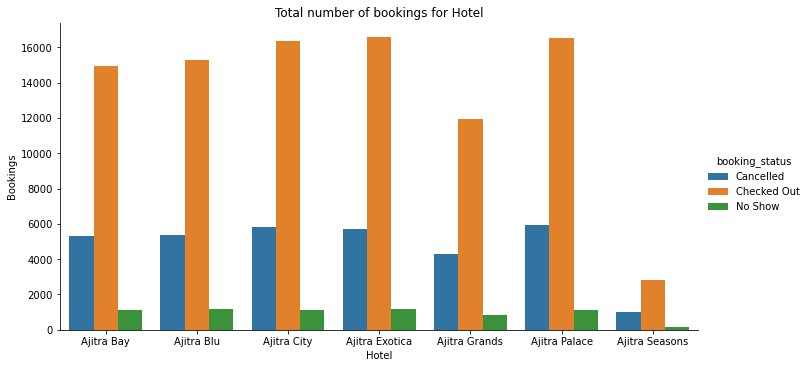

In [64]:
# Create the clustered column chart
sns.catplot(x="property_name", y="booking_id", hue="booking_status", kind="bar", data=hotelbookstatus,height=5, aspect=2)
           
# Add labels and title to the chart
plt.title('Total number of bookings for Hotel')
plt.xlabel('Hotel')
plt.ylabel('Bookings')
# Show the plot
plt.show()

In [65]:
channelbookstatus=dfbookings.groupby(['booking_status','booking_platform'])['booking_id'].count().reset_index()
print(channelbookstatus)

   booking_status booking_platform  booking_id
0       Cancelled   direct offline        1654
1       Cancelled    direct online        3344
2       Cancelled          journey        2009
3       Cancelled          logtrip        3586
4       Cancelled     makeyourtrip        6722
5       Cancelled           others       13698
6       Cancelled         tripster        2407
7     Checked Out   direct offline        4742
8     Checked Out    direct online        9401
9     Checked Out          journey        5716
10    Checked Out          logtrip       10416
11    Checked Out     makeyourtrip       18825
12    Checked Out           others       38586
13    Checked Out         tripster        6725
14        No Show   direct offline         359
15        No Show    direct online         634
16        No Show          journey         381
17        No Show          logtrip         754
18        No Show     makeyourtrip        1351
19        No Show           others        2782
20        No 

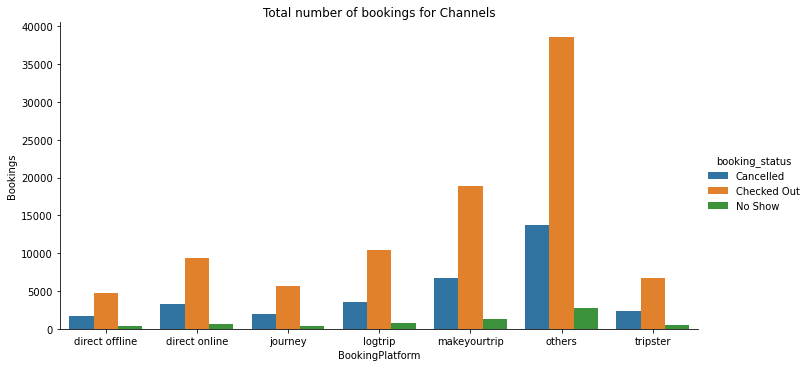

In [66]:
# Create the clustered column chart
sns.catplot(x="booking_platform", y="booking_id", hue="booking_status", kind="bar", data=channelbookstatus,height=5, aspect=2)
           
# Add labels and title to the chart
plt.title('Total number of bookings for Channels')
plt.xlabel('BookingPlatform')
plt.ylabel('Bookings')
# Show the plot
plt.show()

<AxesSubplot:>

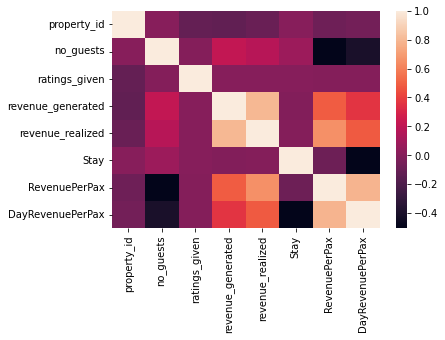

In [67]:
sns.heatmap(dfbookings.corr())

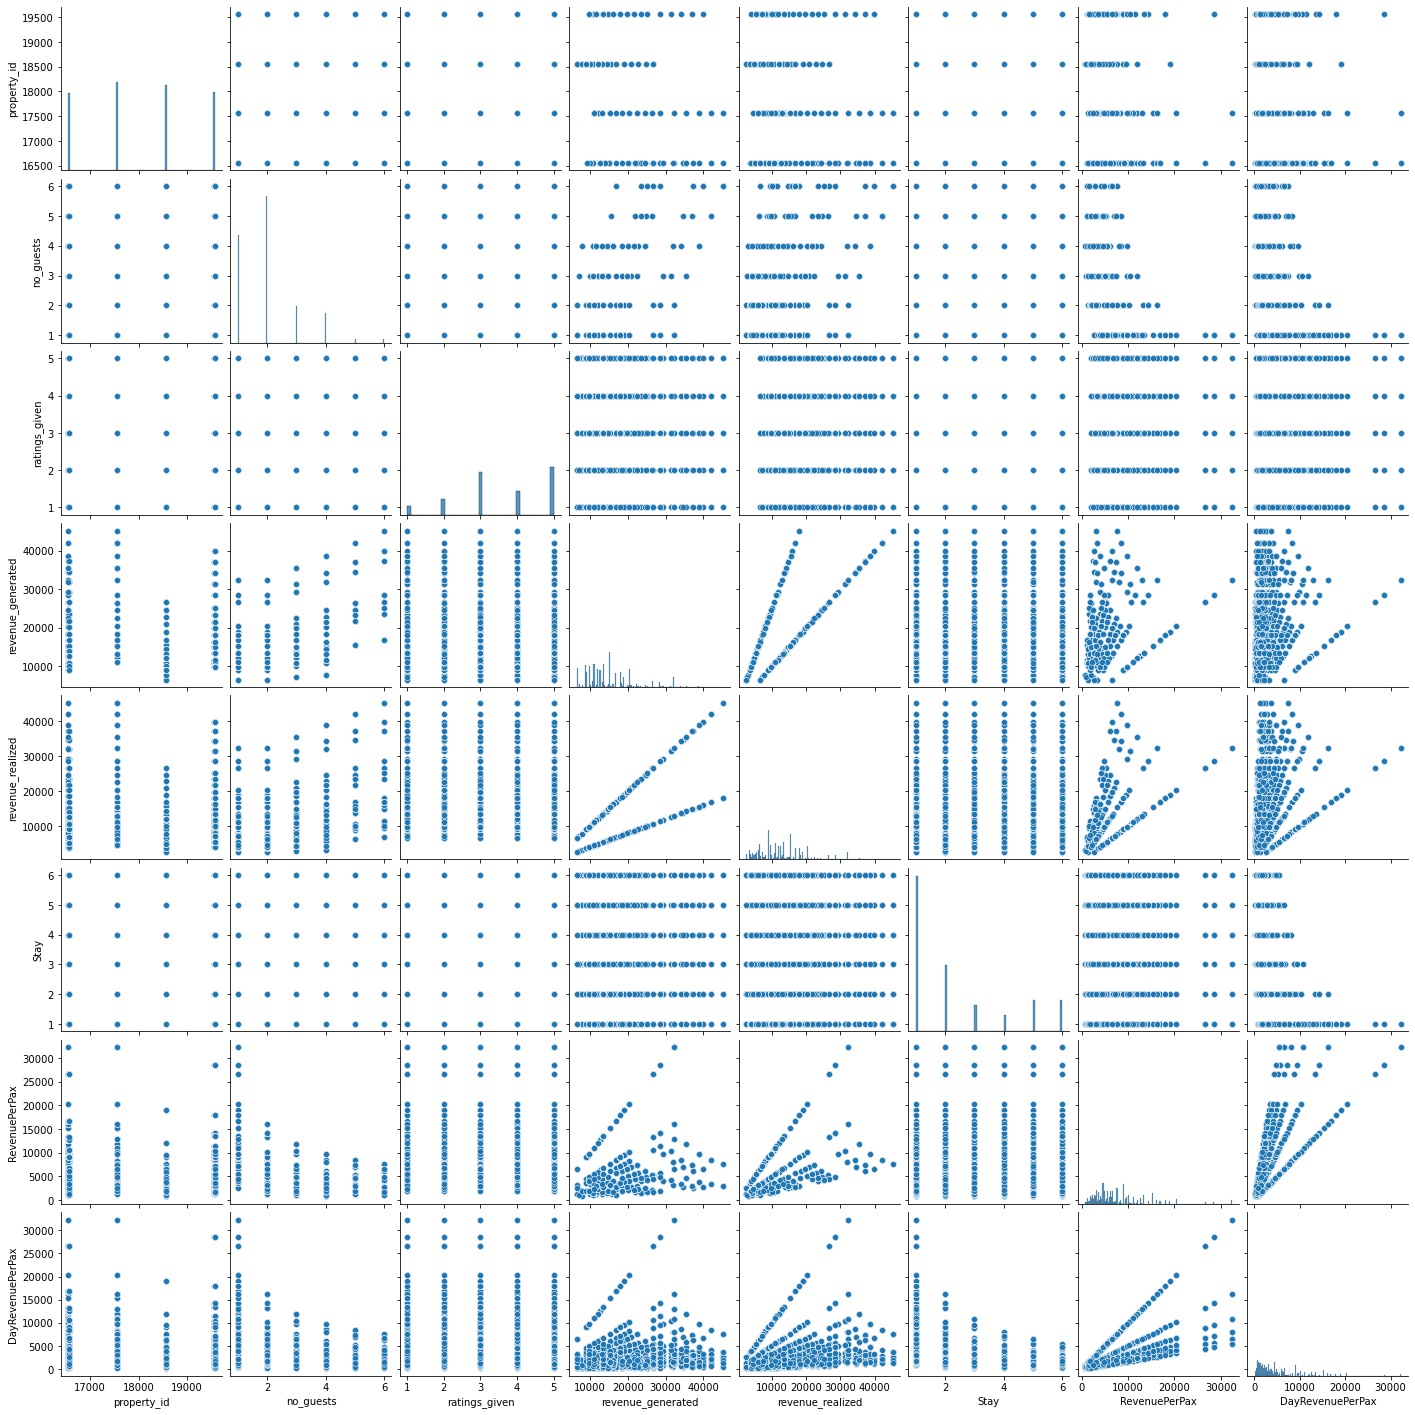

In [68]:
sns.pairplot(dfbookings)

<AxesSubplot:ylabel='Frequency'>

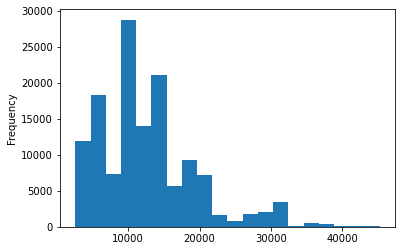

In [69]:
dfbookings['revenue_realized'].plot(kind='hist',bins=20)

In [70]:
dfbookings['revenue_realized'].skew()

1.1869637530443287

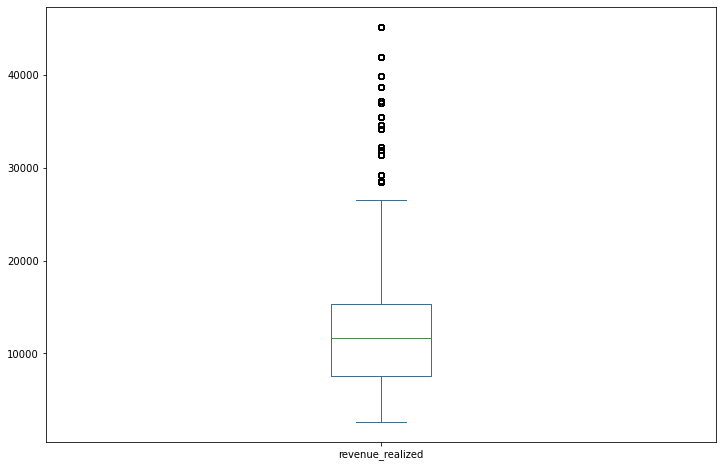

In [71]:
plt.figure(figsize=(12,8))
dfbookings['revenue_realized'].plot(kind='box')
plt.show()

<AxesSubplot:ylabel='Frequency'>

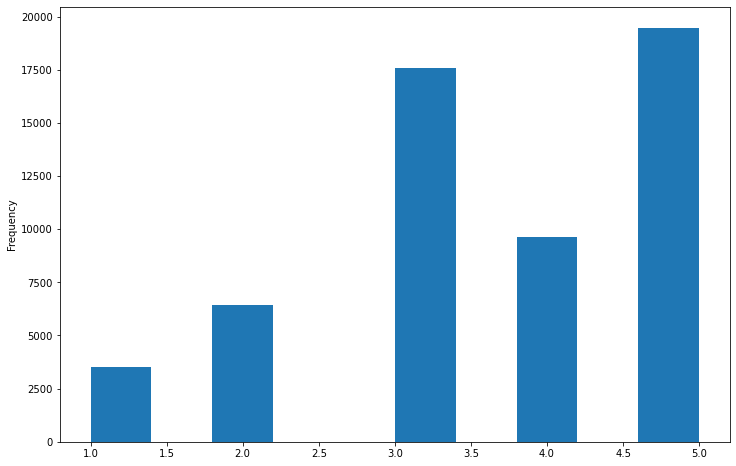

In [72]:
plt.figure(figsize=(12,8))
dfbookings['ratings_given'].plot(kind='hist')

In [73]:
dfbookings['ratings_given'].skew()

-0.4050407076135011

In [74]:
pd.crosstab(dfbookings['ratings_given'],dfbookings['no_guests'])

no_guests,1,2,3,4,5,6
ratings_given,,,,,,
1.0,1061,1647,409,334,51,35
2.0,1964,3032,722,605,56,73
3.0,6186,7468,1990,1556,188,173
4.0,3232,4279,1076,881,99,86
5.0,6276,8794,2224,1784,187,215


In [75]:
pd.crosstab(dfbookings['ratings_given'],dfbookings['room_class'],normalize='columns')*100

room_class,Elite,Premium,Presidential,Standard
ratings_given,,,,
1.0,6.020854,6.468052,6.729651,6.134138
2.0,11.590025,11.399451,11.279070,11.147379
3.0,31.853347,31.901215,26.555233,31.015582
4.0,17.149584,16.895335,17.441860,16.807292
5.0,33.386190,33.335947,37.994186,34.895609


<AxesSubplot:xlabel='room_class', ylabel='ratings_given'>

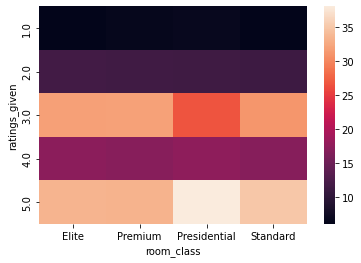

In [76]:
sns.heatmap(pd.crosstab(dfbookings['ratings_given'],dfbookings['room_class'],normalize='columns')*100)

In [77]:
pd.crosstab(dfbookings['ratings_given'],dfbookings['no_guests'],normalize='columns')*100

no_guests,1,2,3,4,5,6
ratings_given,,,,,,
1.0,5.668038,6.530531,6.369724,6.472868,8.777969,6.013746
2.0,10.492013,12.022205,11.244354,11.724806,9.638554,12.542955
3.0,33.046637,29.611420,30.992057,30.155039,32.358003,29.725086
4.0,17.265880,16.966693,16.757514,17.073643,17.039587,14.776632
5.0,33.527432,34.869151,34.636349,34.573643,32.185886,36.941581


<AxesSubplot:xlabel='no_guests', ylabel='ratings_given'>

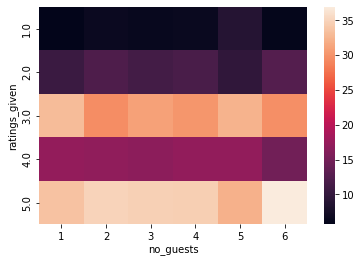

In [78]:
sns.heatmap(pd.crosstab(dfbookings['ratings_given'],dfbookings['no_guests'],normalize='columns')*100)

In [79]:
pd.crosstab(dfbookings['ratings_given'],dfbookings['property_name'],normalize='columns')*100

property_name,Ajitra Bay,Ajitra Blu,Ajitra City,Ajitra Exotica,Ajitra Grands,Ajitra Palace,Ajitra Seasons
ratings_given,,,,,,,
1.0,6.796875,4.220886,4.476411,7.418307,8.078572,4.432301,20.574163
2.0,11.551339,5.576818,6.890655,14.836615,18.218287,6.699049,46.710526
3.0,24.866071,25.904866,37.108943,23.827887,43.754323,34.770289,19.617225
4.0,17.533482,18.611263,17.724575,16.237061,15.534652,17.678608,8.851675
5.0,39.252232,45.686167,33.799417,37.680130,14.414165,36.419753,4.246411


<AxesSubplot:xlabel='property_name', ylabel='ratings_given'>

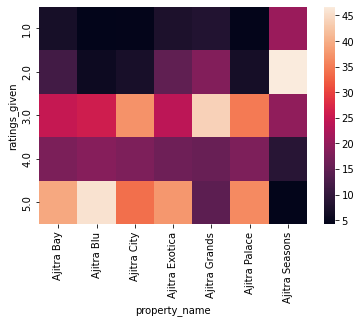

In [80]:
sns.heatmap(pd.crosstab(dfbookings['ratings_given'],dfbookings['property_name'],normalize='columns')*100)

In [81]:
pd.crosstab(dfbookings['Stay'],dfbookings['property_name'],normalize='columns')*100

property_name,Ajitra Bay,Ajitra Blu,Ajitra City,Ajitra Exotica,Ajitra Grands,Ajitra Palace,Ajitra Seasons
Stay,,,,,,,
1,40.380569,40.211058,60.082322,39.891643,39.882595,59.860317,59.392265
2,20.019636,19.848589,20.104618,20.421484,20.598767,20.118519,20.040181
3,6.788536,6.955724,9.874373,7.051747,6.962137,9.866667,10.070316
4,4.969844,4.877265,4.930755,4.880338,5.306721,5.032804,5.123054
5,13.670578,13.792154,2.988466,13.868862,13.636630,3.195767,3.189352
6,14.170835,14.315210,2.019466,13.885926,13.613149,1.925926,2.184832


<AxesSubplot:xlabel='property_name', ylabel='Stay'>

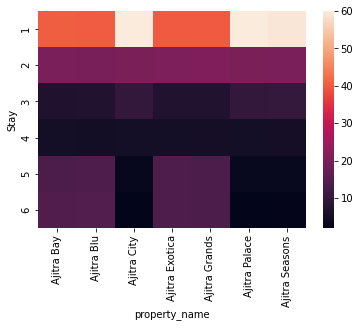

In [82]:
sns.heatmap(pd.crosstab(dfbookings['Stay'],dfbookings['property_name'],normalize='columns')*100)

In [83]:
pd.crosstab(dfbookings['Stay'],dfbookings['room_class'],normalize='columns')*100

room_class,Elite,Premium,Presidential,Standard
Stay,,,,
1,47.809312,46.859255,48.565918,47.518598
2,19.939400,20.287247,20.518883,20.220569
3,8.025452,7.809331,8.517389,8.097071
4,5.043935,5.021920,4.684875,5.025230
5,9.710130,10.027482,8.915573,9.826770
6,9.471771,9.994765,8.797362,9.311762


<AxesSubplot:xlabel='room_class', ylabel='Stay'>

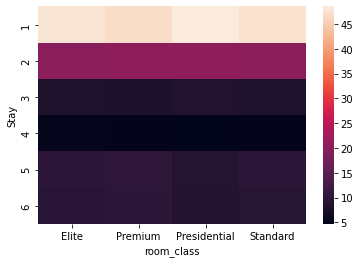

In [84]:
sns.heatmap(pd.crosstab(dfbookings['Stay'],dfbookings['room_class'],normalize='columns')*100)

In [85]:
pd.crosstab(dfbookings['Stay'],dfbookings['city'],normalize='columns')*100

city,Bangalore,Delhi,Hyderabad,Mumbai
Stay,,,,
1,47.226387,49.791589,46.425705,47.598665
2,20.430410,20.205522,19.978216,20.105857
3,8.033483,8.295159,7.976955,8.001381
4,5.066217,4.981222,5.116372,4.839489
5,9.635807,8.604680,10.241344,9.987343
6,9.607696,8.121827,10.261408,9.467265


<AxesSubplot:xlabel='city', ylabel='Stay'>

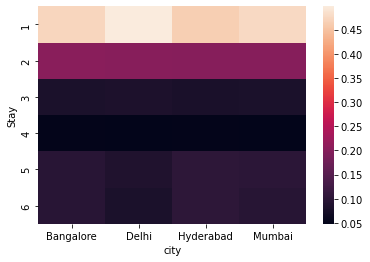

In [86]:
sns.heatmap(pd.crosstab(dfbookings['Stay'],dfbookings['city'],normalize='columns')*1)

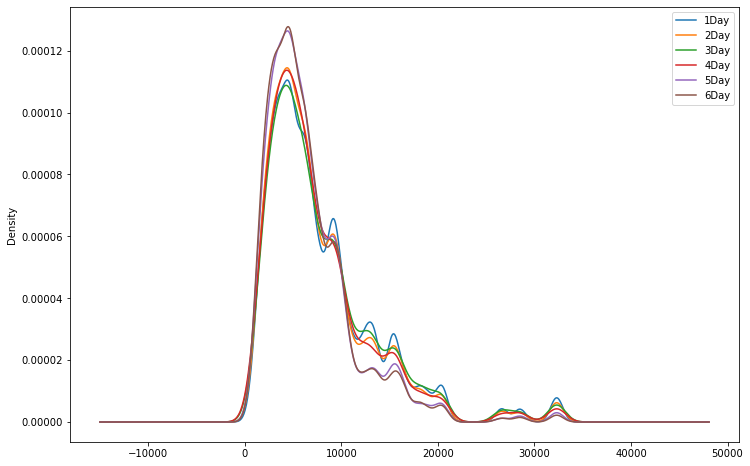

In [87]:
plt.figure(figsize=(12,8))
dfbookings[dfbookings['Stay'] == 1]['RevenuePerPax'].plot(kind='kde',label='1Day')
dfbookings[dfbookings['Stay'] == 2]['RevenuePerPax'].plot(kind='kde',label='2Day')
dfbookings[dfbookings['Stay'] == 3]['RevenuePerPax'].plot(kind='kde',label='3Day')
dfbookings[dfbookings['Stay'] == 4]['RevenuePerPax'].plot(kind='kde',label='4Day')
dfbookings[dfbookings['Stay'] == 5]['RevenuePerPax'].plot(kind='kde',label='5Day')
dfbookings[dfbookings['Stay'] == 6]['RevenuePerPax'].plot(kind='kde',label='6Day')

plt.legend()
plt.show()

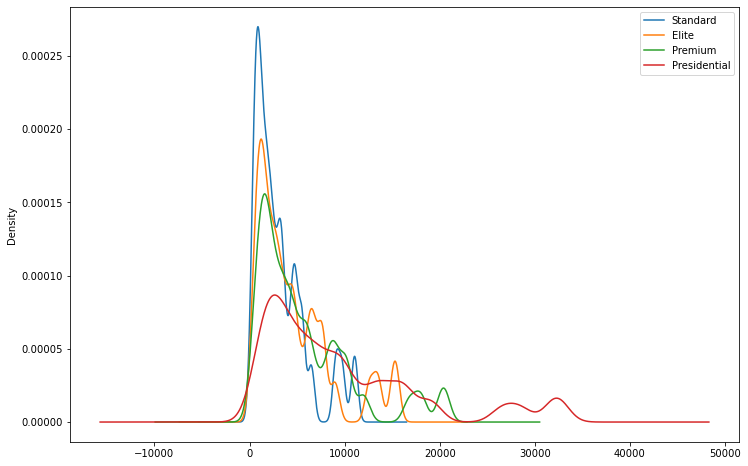

In [88]:
plt.figure(figsize=(12,8))
dfbookings[dfbookings['room_class'] == 'Standard']['DayRevenuePerPax'].plot(kind='kde',label='Standard')
dfbookings[dfbookings['room_class'] == 'Elite']['DayRevenuePerPax'].plot(kind='kde',label='Elite')
dfbookings[dfbookings['room_class'] == 'Premium']['DayRevenuePerPax'].plot(kind='kde',label='Premium')
dfbookings[dfbookings['room_class'] == 'Presidential']['DayRevenuePerPax'].plot(kind='kde',label='Presidential')

plt.legend()
plt.show()

<AxesSubplot:>

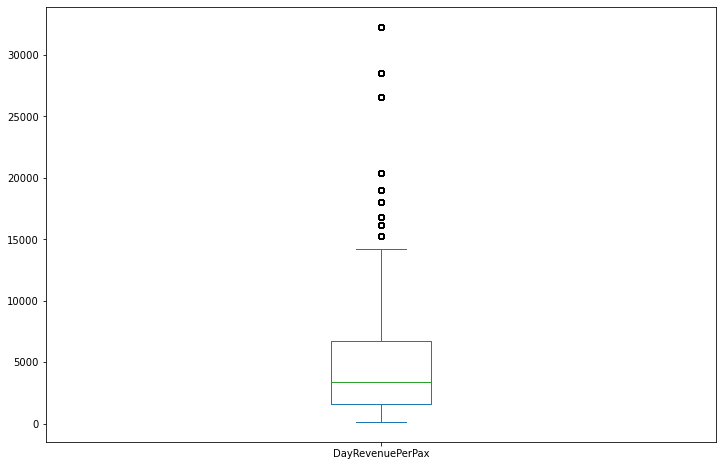

In [89]:
plt.figure(figsize=(12,8))
dfbookings['DayRevenuePerPax'].plot(kind='box')

<AxesSubplot:>

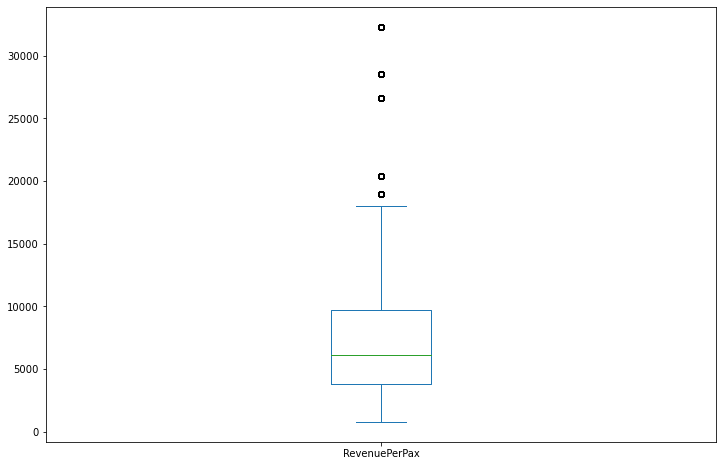

In [90]:
plt.figure(figsize=(12,8))
dfbookings['RevenuePerPax'].plot(kind='box')

<AxesSubplot:xlabel='property_name', ylabel='DayRevenuePerPax'>

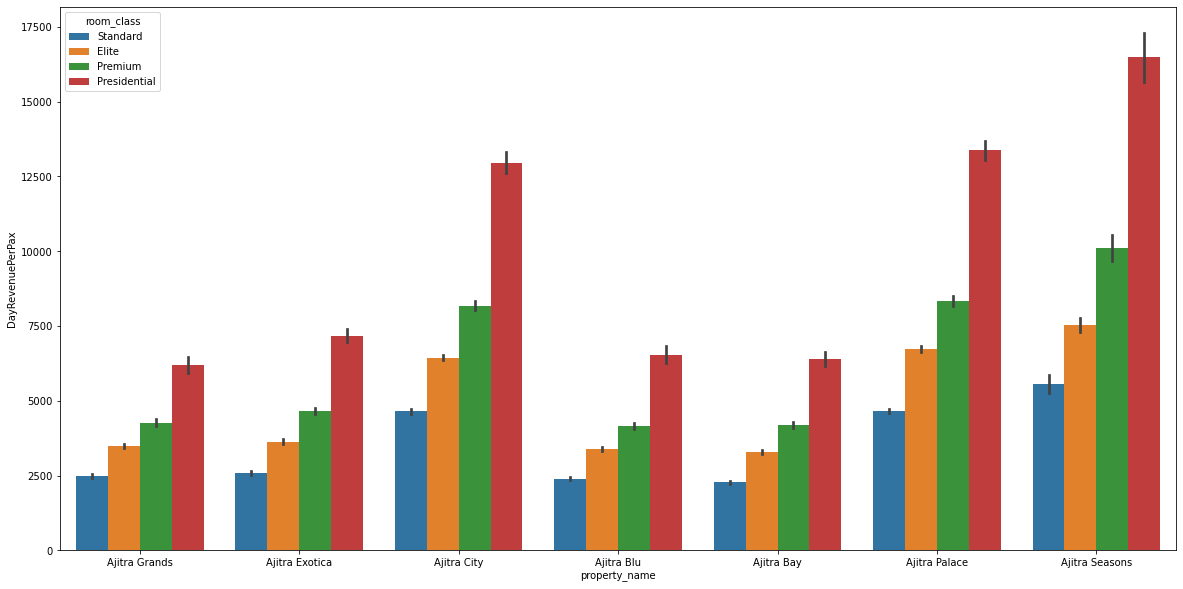

In [91]:
plt.figure(figsize=(20,10))
sns.barplot(x='property_name',y='DayRevenuePerPax',hue='room_class',data=dfbookings)

<AxesSubplot:xlabel='property_name', ylabel='DayRevenuePerPax'>

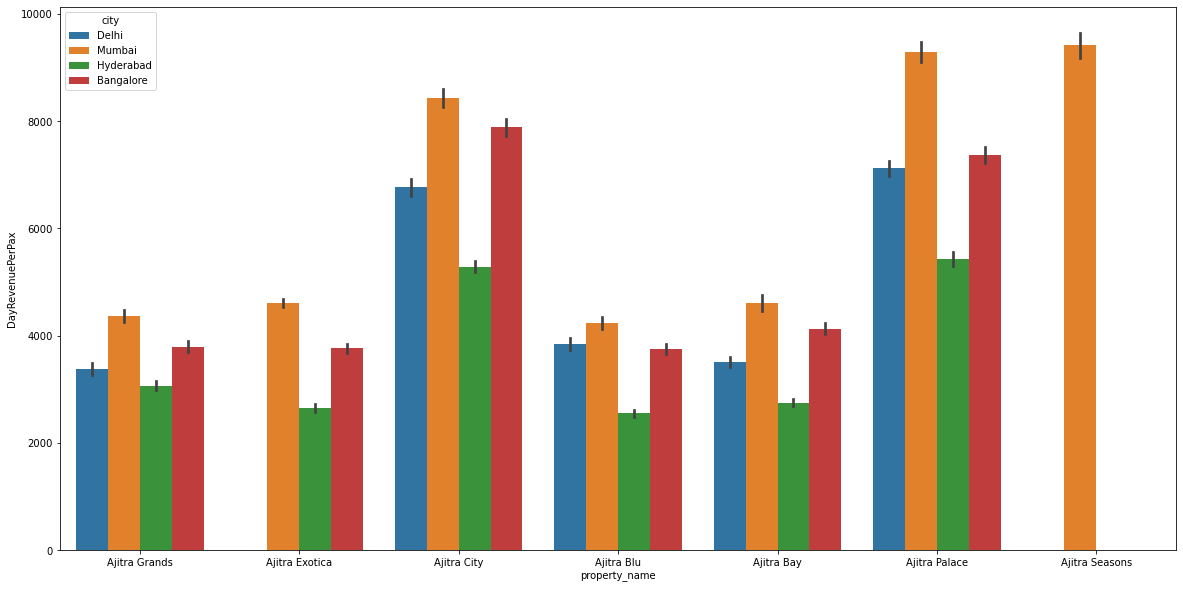

In [92]:
plt.figure(figsize=(20,10))
sns.barplot(x='property_name',y='DayRevenuePerPax',hue='city',data=dfbookings)

<AxesSubplot:xlabel='property_name', ylabel='DayRevenuePerPax'>

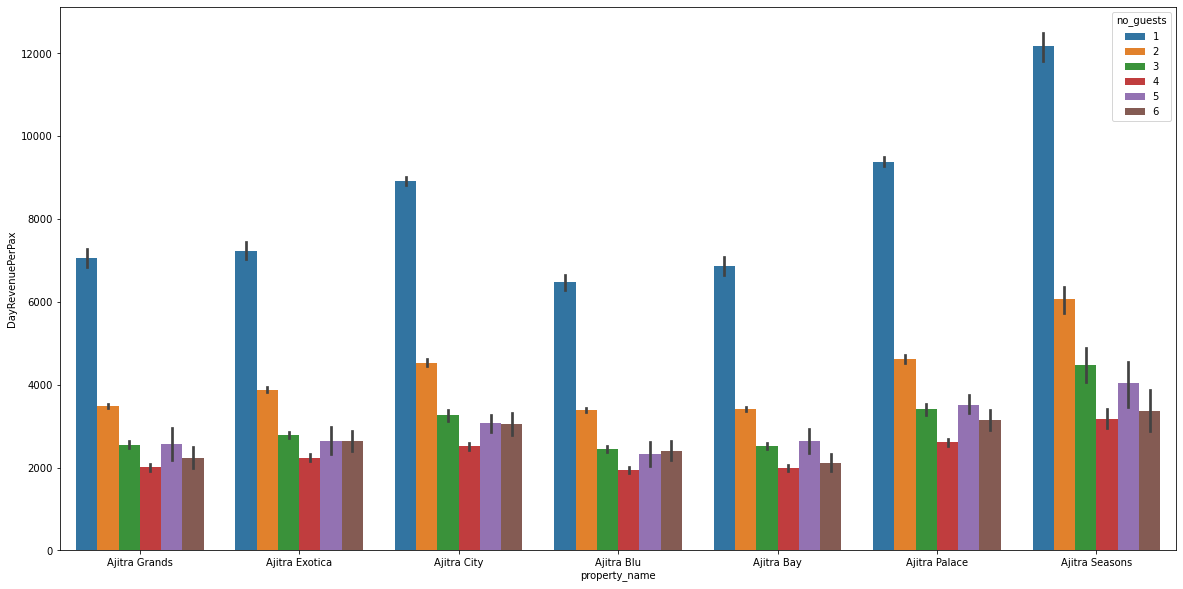

In [93]:
plt.figure(figsize=(20,10))
sns.barplot(x='property_name',y='DayRevenuePerPax',hue='no_guests',data=dfbookings)

<AxesSubplot:xlabel='property_name', ylabel='DayRevenuePerPax'>

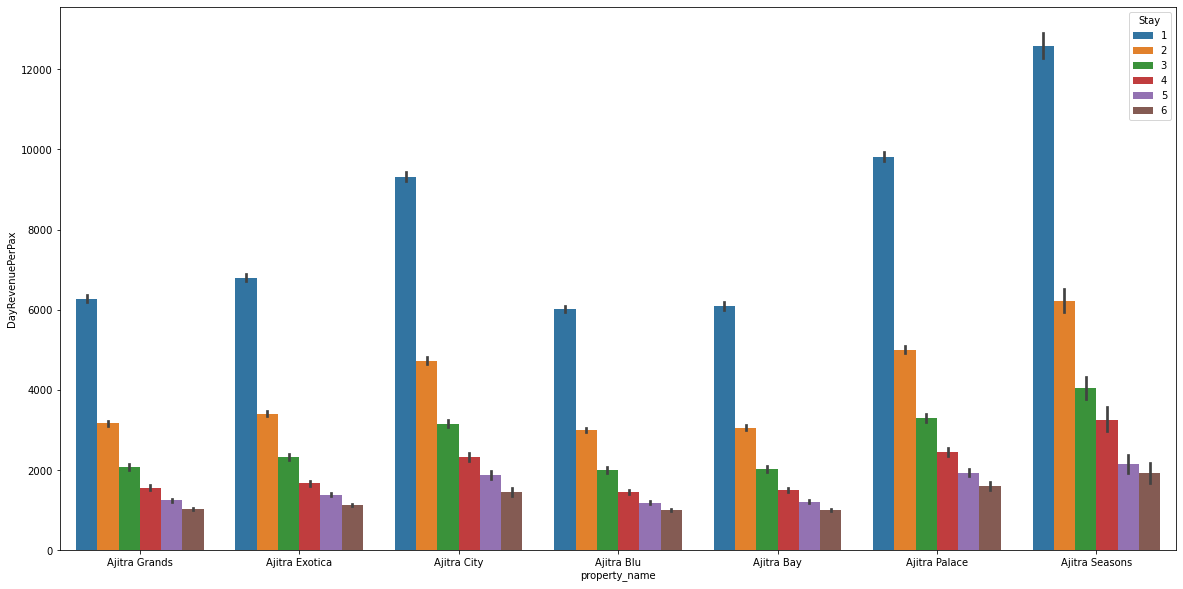

In [94]:
plt.figure(figsize=(20,10))
sns.barplot(x='property_name',y='DayRevenuePerPax',hue='Stay',data=dfbookings)

<AxesSubplot:xlabel='property_name', ylabel='revenue_realized'>

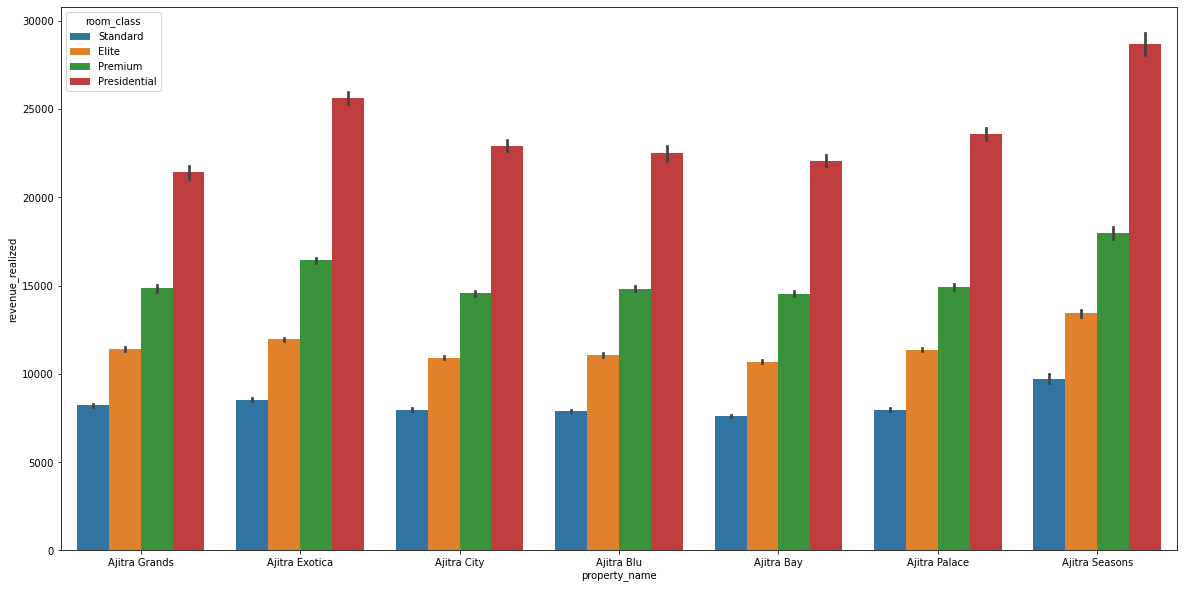

In [95]:
plt.figure(figsize=(20,10))
sns.barplot(x='property_name',y='revenue_realized',hue='room_class',data=dfbookings)

<AxesSubplot:xlabel='property_name', ylabel='revenue_realized'>

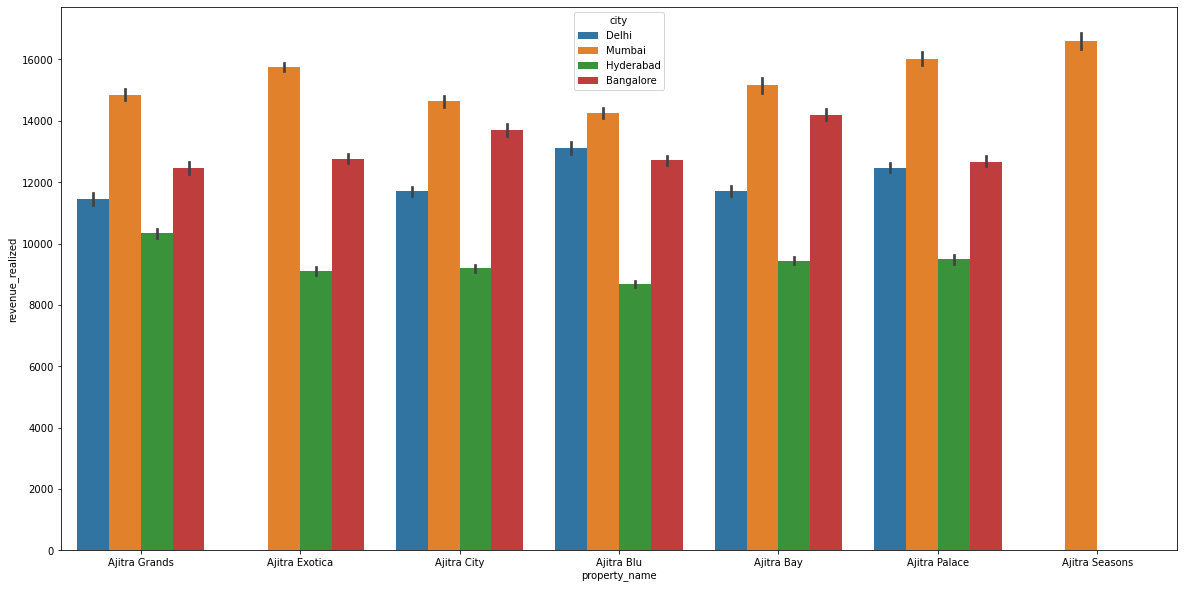

In [96]:
plt.figure(figsize=(20,10))
sns.barplot(x='property_name',y='revenue_realized',hue='city',data=dfbookings)